In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
from pyclustertend import hopkins, vat, ivat
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/envs/py19/lib/python3.6/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
datasets = list(DATA_DIR.glob('embeddings/*/*.pickle'))
len(datasets)

83

In [4]:
from sklearn import datasets
X = datasets.load_iris().data

In [5]:
np.shape(X)

(150, 4)

In [6]:
from avgn.clusterability.hopkins_pyclustertend import hopkins

In [8]:
hopkins(X, sampling_size=int(len(X)/10))

0.1427360118374919

# VAT

### Step 1

In [10]:
from sklearn.metrics import pairwise_distances

In [17]:
X.shape

(150, 4)

In [11]:
I = []

R = pairwise_distances(X)
P = np.zeros(R.shape[0], dtype="int")

argmax = np.argmax(R)

j = argmax % R.shape[1]
i = argmax // R.shape[1]

P[0] = i
I.append(i)

K = np.linspace(0, R.shape[0] - 1, R.shape[0], dtype="int")
J = np.delete(K, i)

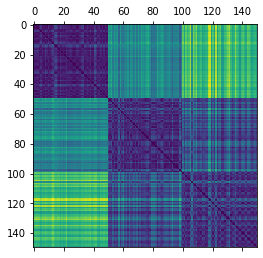

In [13]:
plt.matshow(R)

In [22]:
P

array([ 13,  38,   8,  42,  47,   2,   3,  29,  30,  34,   9,   1,  12,
        45,  25,   6,  11,   7,  39,  49,  27,  28,   0,  17,   4,  40,
        37,  26,  23,  35,  43,  48,  10,  21,  19,  46,  36,  31,  20,
        24,  16,   5,  18,  32,  33,  15,  44,  14,  22,  41,  98,  57,
        93,  60,  81,  80,  69,  89,  53,  92,  82,  67,  99,  96,  95,
        88,  94,  90,  61,  55,  66,  84,  78,  91,  63,  73,  79,  71,
        97,  74,  75,  65,  58,  54,  86,  52,  50,  51,  56,  76,  77,
        85,  59, 147, 110, 111, 145, 141, 139, 112, 140, 144, 120, 143,
       124, 104, 132, 128, 103, 137, 116, 115, 148, 136, 146, 123, 126,
       127, 138,  70, 149, 101, 142, 113, 121,  72,  83, 133, 102, 125,
       129,  64, 100, 119, 107, 130,  62, 114,  68,  87, 105, 122, 118,
       134, 135, 108, 109, 106, 117, 131])

In [21]:
J

array([], dtype=int64)

In [16]:
R.shape

(150, 150)

In [15]:
i, j

(13, 118)

In [14]:
P

array([13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

### Step 2 :

In [18]:
# for each row, if the distance bewteen elements is less than mini (the max in the row), pair elements together

for r in range(1, R.shape[0]):

    p, q = (-1, -1)

    mini = np.max(R)

    for candidate_p in I:
        for candidate_j in J:
            if R[candidate_p, candidate_j] < mini:
                p = candidate_p
                q = candidate_j
                mini = R[p, q]

    P[r] = q
    I.append(q)

    ind_q = np.where(np.array(J) == q)[0][0]
    J = np.delete(J, ind_q)

In [19]:
mini

0.4123105625617509

### step 3

In [26]:
P

array([ 13,  38,   8,  42,  47,   2,   3,  29,  30,  34,   9,   1,  12,
        45,  25,   6,  11,   7,  39,  49,  27,  28,   0,  17,   4,  40,
        37,  26,  23,  35,  43,  48,  10,  21,  19,  46,  36,  31,  20,
        24,  16,   5,  18,  32,  33,  15,  44,  14,  22,  41,  98,  57,
        93,  60,  81,  80,  69,  89,  53,  92,  82,  67,  99,  96,  95,
        88,  94,  90,  61,  55,  66,  84,  78,  91,  63,  73,  79,  71,
        97,  74,  75,  65,  58,  54,  86,  52,  50,  51,  56,  76,  77,
        85,  59, 147, 110, 111, 145, 141, 139, 112, 140, 144, 120, 143,
       124, 104, 132, 128, 103, 137, 116, 115, 148, 136, 146, 123, 126,
       127, 138,  70, 149, 101, 142, 113, 121,  72,  83, 133, 102, 125,
       129,  64, 100, 119, 107, 130,  62, 114,  68,  87, 105, 122, 118,
       134, 135, 108, 109, 106, 117, 131])

In [23]:
ODM = np.zeros(R.shape)

for i in range(ODM.shape[0]):
    for j in range(ODM.shape[1]):
        ODM[i, j] = R[P[i], P[j]]


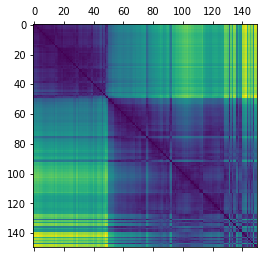

In [25]:
plt.matshow(ODM)

# iVAT

In [28]:
from avgn.clusterability.VAT import ordered_dissimilarity_matrix

In [31]:
D, R = ordered_dissimilarity_matrix(X)
D_prim = np.zeros((D.shape[0], D.shape[0]))

In [32]:
for r in range(1, D.shape[0]):
    # Step 1 : find j for which D[r,j] is minimum and j in [1:r-1]

    j = np.argmin(D[r, 0:r])

    # Step 2 :

    D_prim[r, j] = D[r, j]

    # Step 3 : pour c : 1,r-1 avec c !=j
    c_tab = np.array(range(0, r))
    c_tab = c_tab[c_tab != j]

    for c in c_tab:
        D_prim[r, c] = max(D[r, j], D_prim[j, c])
        D_prim[c, r] = D_prim[r, c]


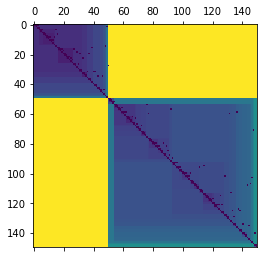

In [33]:
plt.matshow(D_prim)